In [1]:
#Kaitlyn Kirt, CMOR 220, Spring 2024, Neural Networks Project
#Project11.ipynb
#This script uses neural networks to produce letters with arrays
#Last Modified: April 26, 2024

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def Sigmoid(x): 
#inputs: x
#outputs: s
#description: this function denotes the sigmoid function and returns its value
    s=1./(1+np.exp(0.5-x))
    return s

In [4]:
def Modify(L):
#inputs: L
#outputs: L
#description: this function modifies an array's binary structure
    n=np.random.randint(25)
    L=np.copy(L) #preallocate letter to be identical to another
    #if statement flips value in L 
    if L[0,n]==0:
        L[0,n] = 1
    else: 
        L[0,n] = 0
    return L

In [5]:
def NeuralTrainer(v,w,maxiter,rate,trnd,trgd):
#inputs: v,w,maxiter,rate,trnd,trgd
#outputs: v,w
#description: this function goes through a gradient to recognize the letter r,i,c,e 
    for i in range (maxiter): #runs the code for maxiter times
        rand = np.random.randint(0,np.shape(trnd)[0]-1)
        p=np.transpose(trnd[rand,:]) #selects a certain letter to runa and train the neural trainer
        q=Sigmoid(v@p)
        o=Sigmoid(w@q)
        tmp=(o-np.transpose(trgd[rand,:])) @ np.transpose(o) @ (1-o)
        grad_w=tmp @ np.transpose(q)
        grad_v=(np.transpose(w)*q*(1-q)) @ tmp @ np.transpose(p) 
        v=v-rate*grad_v
        w=w-rate*grad_w
    return v,w

In [6]:
def NeuralNetwork(trnd,trgd,maxiter,rate,L): 
#inputs: trnd,trgd,maxiter,rate
#outputs: corrcnt
#description: this function uses past functions and acts like a secondary driver
    np.random.seed(0) #create a set of pseudo-random numbers 
    v1=np.random.standard_normal(size=(25,25)) #random v array
    np.random.seed(0) #create a set of pseudo-random numbers 
    w1=np.random.standard_normal(size=(2,25)) #random w array
    [v,w]=NeuralTrainer(v1,w1,maxiter,rate,trnd,trgd) #runs the neural trainer function
    count=0
    for n in range(0,100): #runs code 100 times
        Lmod=Modify(L) 
        q=Sigmoid(v@Lmod.T)
        val=Sigmoid(w@q)
        if np.round(val[0])==1 and np.round(val[1])==1:
            count=count+1
        else:
            count=count
    corrcnt=(count/100)*100
    return corrcnt

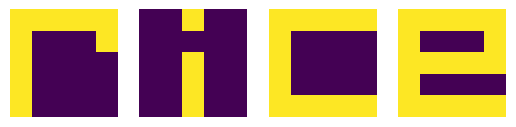

Correct%=0.0


In [7]:
#driver
r = np.array([1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0]) #creates the vector for r
i = np.array([0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0]) #creates the vector for i
c = np.array([1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1]) #creates the vector for c
e = np.array([1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1]) #creates the vector for e

trnd = np.array([[r],[i],[c],[e]])
trgd = np.array([[[0,0]],[[0,1]],[[1,0]],[[1,1]]])

plt.figure()
plt.subplot(1,4,1) #plots the letter r 
plt.imshow(np.reshape(r,(5,5))) ; plt.axis('off') #reshapes to a 5x5 matrix 
plt.subplot(1,4,2) #plots the letter i
plt.imshow(np.reshape(i,(5,5))) ; plt.axis ('off') #reshapes to a 5x5 matrix 
plt.subplot(1,4,3) #plots the letter c
plt.imshow(np.reshape(c,(5,5))); plt.axis('off') #reshapes to a 5x5 matrix 
plt.subplot(1,4,4) #plots the letter e
plt.imshow(np.reshape(e,(5,5))) ; plt.axis('off') #reshapes to a 5x5 matrix 
plt.show()

corrcnt=NeuralNetwork(trnd,trgd,5000,0.1,trnd[3,:])
print('Correct%=' +str(corrcnt))